In [1]:
# Automatically set base path to the project directory where the notebook is running
from pathlib import Path

# This gets the directory where the current notebook is located
base_path = Path.cwd()

print(f"📂 Base path automatically set to: {base_path}")

📂 Base path automatically set to: c:\GH\ASFPM-LLM-Data-Management-Workshop


# 📊 HDF5 Data Processing with Python and ChatGPT

Welcome to **HDF5 Data Processing**! In this session, we will use **ChatGPT**, **HDF5**, and **Python** to efficiently store, manipulate, and analyze large datasets.

### Enable the Table of Contents Sidebar in Jupyter Notebook  
For easier navigation:

1. Click on **View** in Jupyter Notebook.
2. Select **Left Sidebar** click **Show Table of Contents**.

## 📌 What You Will Learn
1. Set up your computer for **Python scripting** and **HDF5 file processing**.
2. Use **ChatGPT** to generate and debug **HDF5 queries**.
3. Learn best practices for **efficient data management** with HDF5.
4. Process and analyze **HDF5 datasets** using **Python and Numpy**.

## 🛠️ Required Programs
- **Python** (Version 3.12 or later)
- **HDF5 View** (Library for hierarchical data storage)
- **h5py** (Python library for working with HDF5 files)
- **Numpy** (For reading and analyzing HDF5 data)

---

## ▶️ Run the Test Cell  
Before we begin, run the test cell below to check your setup.

This test will:
- ✅ Verify that **HDF5 (h5py)** is available.
- ✅ Check if **Pandas** is installed.
- ✅ Confirm that an **HDF5 file can be created and accessed**.




In [2]:
# Checking HDF5 and Pandas Setup

print("🔍 Checking system setup...\n")

# Test h5py (HDF5 support)
try:
    import h5py
    with h5py.File("test.hdf5", "w") as f:
        f.create_dataset("test_data", data=[1, 2, 3, 4, 5])
    print("✅ HDF5 (h5py) is available and working!")
except Exception as e:
    print(f"❌ HDF5 test failed: {e}")

# Test Pandas
try:
    import pandas as pd
    print("✅ Pandas imported successfully!")
except ImportError:
    print("❌ Pandas is not installed. Run `pip install pandas`.")

# Confirm Python version
import sys
print(f"🐍 Python version: {sys.version.split()[0]}")

print("\n✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.")


🔍 Checking system setup...

✅ HDF5 (h5py) is available and working!
✅ Pandas imported successfully!
🐍 Python version: 3.12.9

✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.


# 📊 Using ChatGPT's Code Interpreter to Explore HDF5 Data Structure

## Purpose

Use ChatGPT to help you understand and analyze HDF5 data. Before performing any analysis, it's important to understand the file structure as a reference, so ChatGPT can handle the coding, syntax, and data types and you can focus on describing the actual task you want to complete, such as mapping wsel/velocity or calculating shear stress.

## ChatGPT Prompt for HDF Explorer Function

Prompt ChatGPT:

```
Write a function that will recursively explore an HDF File path.  List all attributes, groups, datasets, compound datasets and objects.  For each, list the full path, type, data types, dataset dataspace and datatype,to ensure a complete readout of all info needed to extract data from the HDF path.  The function should be robust, comprehensive and provide information for all different data types that might be present.

Use the provided TIMDEPNC.HDF5 and RAS_Muncie.p04.hdf to test the function by reading he following paths:


TIMDEPNC.HDF5: TIMDEP OUTPUT RESULTS/

RAS_Muncie.p04.hdf: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area

```
Provide the files and work with GPT until it achieves a desirable result.  

Then, ask for a script for local execution:

```
Provide a jupyter notebook cell for my local notebook.  The HDF files are located in the same folder as the notebook, under the "Data\Hdf5\" subfolder.  
```




![ChatGPT HDF Explorer](images/chatgpt-hdfexplorer.png)
[ChatGPT Conversation for HDF Exploration](https://chatgpt.com/share/67f1ad34-2f60-8010-8381-6f3d449aa812)

In [3]:
import h5py
import os

def explore_hdf5(filepath, target_path="/", indent=0):
    """
    Recursively explores an HDF5 file and prints information about each group, dataset, and attribute.

    Parameters:
    - filepath: str, path to the HDF5 file
    - target_path: str, internal path in the HDF5 file to start exploration
    - indent: int, current indentation level for pretty printing
    """
    def print_info(name, obj, level):
        spacing = ' ' * level
        full_path = obj.name
        obj_type = type(obj).__name__
        print(f"{spacing}Path: {full_path}")
        print(f"{spacing}Type: {obj_type}")

        if isinstance(obj, h5py.Dataset):
            print(f"{spacing} - Shape: {obj.shape}")
            print(f"{spacing} - Data type: {obj.dtype}")
            try:
                print(f"{spacing} - Dataspace (dims): {obj.shape}")
                print(f"{spacing} - Datatype (HDF5 native): {obj.id.get_type().get_class()}")
            except Exception as e:
                print(f"{spacing} - Error reading dataspace/datatype: {e}")
        elif isinstance(obj, h5py.Group):
            print(f"{spacing} - Contains: {len(obj)} items")

        # Print attributes
        if obj.attrs:
            print(f"{spacing} - Attributes:")
            for key, val in obj.attrs.items():
                print(f"{spacing}   * {key}: {val}")
        print("\n")

    with h5py.File(filepath, 'r') as file:
        def recursive_visit(group, level=0):
            for key in group:
                item = group[key]
                print_info(key, item, level)
                if isinstance(item, h5py.Group):
                    recursive_visit(item, level + 2)

        root = file[target_path]
        print_info(target_path, root, indent)
        if isinstance(root, h5py.Group):
            recursive_visit(root, indent + 2)



In [4]:
# Explore the specified paths (FLO2D)
flo2d_timdepnc_file = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
print("Exploring TIMDEPNC.HDF5:\n")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/")



Exploring TIMDEPNC.HDF5:

Path: /TIMDEP OUTPUT RESULTS
Type: Group
 - Contains: 13 items
 - Attributes:
   * Grouptype: [b'Generic']


  Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
  Type: Group
   - Contains: 4 items
   - Attributes:
     * Data Type: [0]
     * DatasetCompression: [9]
     * DatasetUnits: [b'ft or m']
     * Grouptype: [b'DATASET SCALAR']
     * TimeUnits: [b'Hours']


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times
    Type: Dataset
     - Shape: (200,)
     - Data type: float64
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESU

In [5]:
# Explore the specified paths (HEC-RAS 2D)
ras_file = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
print("\nExploring RAS_Muncie.p04.hdf:\n")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area")



Exploring RAS_Muncie.p04.hdf:

Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area
Type: Group
 - Contains: 3 items


  Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations
  Type: Group
   - Contains: 18 items


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Iteration Number
    Type: Dataset
     - Shape: (289, 1)
     - Data type: int32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF5 native): 0
     - Attributes:
       * Description: b'Sum of inner-loop iterations over all outer-loop iterations'


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Max Volume Residual
    Type: Dataset
     - Shape: (289, 1)
     - Data type: float32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF

-----

# User-Guided Data Exploration of HDF5 Files 

Now that we have a detailed description of the HDF's data contents, let's build functions to extract the data.  While this detailed information is no required, it is very helpful to reduce up-front errors and iterations.  To include this information in ChatGPT, just copy the cell output and paste into ChatGPT:   


Go to the previous output cell:  
![VS Code - Copy Cell Output](images/vscode-copycelloutput.png)  
Copy the Cell Output and paste into ChatGPT

-----

## Prompt for Extracting **FLO2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/TIMDEPNC.HDF5` in HDFView

- **Water Surface Elevation Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/`, containing water surface values for each grid element over time.
- **Depth Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/FLOW DEPTH/`, containing depth values for each grid element over time.
- **Time Intervals**: Found in `TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times`, representing the time steps for the depth and velocity data.
- **X and Y Coordinates** Found in TIMDEPNC.HDF5, `/TIMDEP OUTPUT RESULTS/X-Coordinate/Values` and `/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`

Follow-up: 
`Provide a code cell for my local notebook.  The local path for the HDF5 file is Data/Hdf5/TIMDEPNC.HDF5`


1. Upload TIMDEPNC.HDF5 and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [6]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT

explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/FLOW DEPTH/")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/X-Coordinate/Values")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values")

Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION
Type: Group
 - Contains: 4 items
 - Attributes:
   * Data Type: [0]
   * DatasetCompression: [9]
   * DatasetUnits: [b'ft or m']
   * Grouptype: [b'DATASET SCALAR']
   * TimeUnits: [b'Hours']


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Maxs
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Mins
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times
  Type: Dataset
   - Shape: (200,)
   - Data type: float64
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values
  Type: Dataset
   - Shape: (200, 8588)
   - Data type: float32
   - Dataspace (dims): (200, 8588)
   - Datatype (HDF5 native): 1


Path: /TIMDE

If you don't see something similar to this output, adjust the prompt, provide corrections or try again!

![HDF-Flo2D WSE Map in ChatGPT](images/hdf-flo2d_wse_map.png)

Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step"`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

[ChatGPT Conversation - Flo2D HDF Data Extraction](https://chatgpt.com/share/67f29600-f218-8010-8a3e-42ea9300c60d)

Code Cells from these follow-up requests:

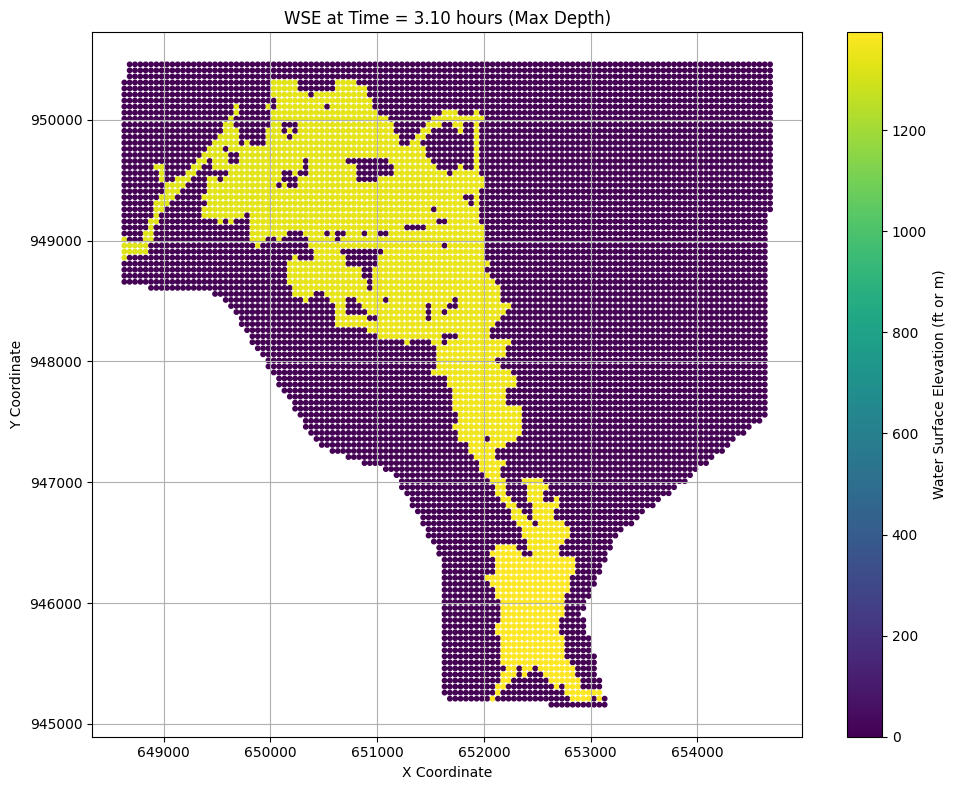

In [7]:
import h5py
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Set the local path to your HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the HDF5 file
with h5py.File(hdf5_path, "r") as f:
    # Load flow depth values and compute the timestep with maximum total depth
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    max_depth_timestep = np.argmax(np.sum(depth_values, axis=1))

    # Load water surface elevation values and time
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]

    # Load X and Y coordinates
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Create an xarray DataArray for Water Surface Elevation
wse_xr_flo = xr.DataArray(
    data=wse_values,
    dims=["time", "element"],
    coords={"time": wse_times, "x": (["element"], x_coords), "y": (["element"], y_coords)},
    name="water_surface_elevation"
)

# Extract data for the time step with maximum depth
wse_at_max_depth = wse_xr_flo.sel(time=wse_times[max_depth_timestep])

# Plot the water surface elevation at the selected time
plt.figure(figsize=(10, 8))
plt.scatter(
    wse_at_max_depth['x'],
    wse_at_max_depth['y'],
    c=wse_at_max_depth.values,
    s=10,
    cmap='viridis'
)
plt.colorbar(label='Water Surface Elevation (ft or m)')
plt.title(f"WSE at Time = {wse_at_max_depth.time.item():.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


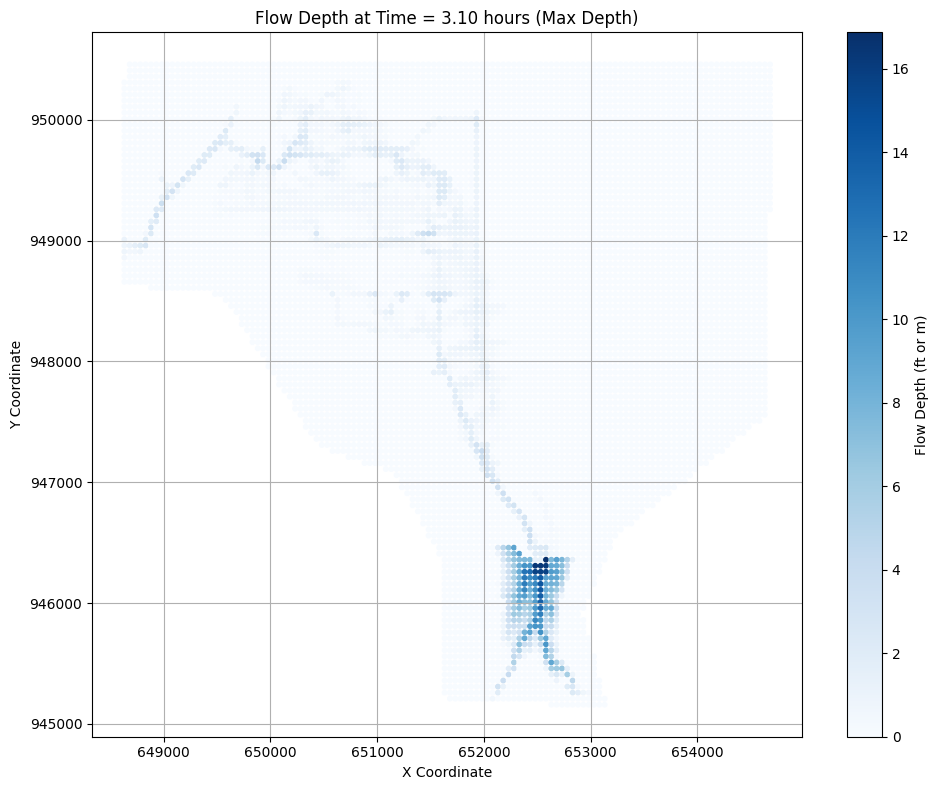

In [8]:
# Extract flow depth at the same time step (already found as max_depth_timestep)
with h5py.File(hdf5_path, "r") as f:
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Get depth data at max depth time step
depth_at_max_time = depth_values[max_depth_timestep, :]

# Plot the Flow Depth
plt.figure(figsize=(10, 8))
plt.scatter(
    x_coords,
    y_coords,
    c=depth_at_max_time,
    s=10,
    cmap='Blues'
)
plt.colorbar(label='Flow Depth (ft or m)')
plt.title(f"Flow Depth at Time = {wse_times[max_depth_timestep]:.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install packages (run only once in your notebook)
!pip install xarray matplotlib imageio --quiet

### Imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm  # Optional: for progress bar
import os

### Load the HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"
with h5py.File(hdf5_path, "r") as f:
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

### Create a folder to store frames
os.makedirs("frames", exist_ok=True)

### Generate and save each frame
filenames = []
for i in tqdm(range(len(wse_times))):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c=wse_values[i], s=10, cmap='viridis')
    plt.colorbar(label="Water Surface Elevation (ft or m)")
    plt.title(f"WSE at Time = {wse_times[i]:.2f} hrs")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()

    fname = f"frames/frame_{i:03d}.png"
    plt.savefig(fname)
    plt.close()
    filenames.append(fname)

### Create GIF
gif_path = "wse_animation_FLO2D.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### Clean up frames (optional)
for filename in filenames:
    os.remove(filename)

print(f"Animation saved as {gif_path}")

-----

## Prompt for Extracting **HEC-RAS 2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/RAS_Muncie.p04.hdf` in HDFView

- **Mesh Name Lookup**: 2D area names can be found in /Results/Unsteady/Geometry Info/2D Area(s).  Results are available for each 2D flow area, and the 2D area name is part of the path so it must be retrieved first (as a list).  In the example HDF file provided, flow_area_name is "2D Interior Area" (only one 2D area)

- **Mesh Cell Centers** can be found here: `/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate`
    
- **Time Date Stamp**: Time stamps are available at this path: `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp` Time Date Stamp is in this format: 02JAN1900 00:00:00

- **Water Surface Elevation Time Series Results**  Water Surface Elevations for each Mesh Cell are located at `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`


Instructions: 
1. Upload RAS_Muncie.p04.hdf and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [9]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT
explore_hdf5(ras_file, target_path="/Results/Unsteady/Geometry Info/2D Area(s)")
explore_hdf5(ras_file, target_path="/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface")

Path: /Results/Unsteady/Geometry Info/2D Area(s)
Type: Dataset
 - Shape: (1,)
 - Data type: |S64
 - Dataspace (dims): (1,)
 - Datatype (HDF5 native): 3


Path: /Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate
Type: Dataset
 - Shape: (5765, 2)
 - Data type: float64
 - Dataspace (dims): (5765, 2)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Plot: b'False'
   * Column: [b'X' b'Y']
   * Row: b'Cell'


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp
Type: Dataset
 - Shape: (289,)
 - Data type: |S19
 - Dataspace (dims): (289,)
 - Datatype (HDF5 native): 3


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface
Type: Dataset
 - Shape: (289, 5765)
 - Data type: float32
 - Dataspace (dims): (289, 5765)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Interpolate: b'True'
   * Can Plot: b'True'
   * Columns: b'Cells'
   * Coverage: b'Wet'
   * Location: b

Example Output from ChatGPT's Code Interpreter
![ChatGPT - HEC-RAS 2D WSE Map](images/hdf-hecras_wse_map.png)
[ChatGPT Conversation for Following Code Cells](https://chatgpt.com/share/67f2a034-5874-8010-9472-bb32f2f38252)



Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step.  Use '/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation' to calculate depth for each cell`

- `Provide a code cell for my local jupyter notebook for both WSE and Depth. The local path is Data/Hdf5/RAS_Muncie.p04.hdf`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

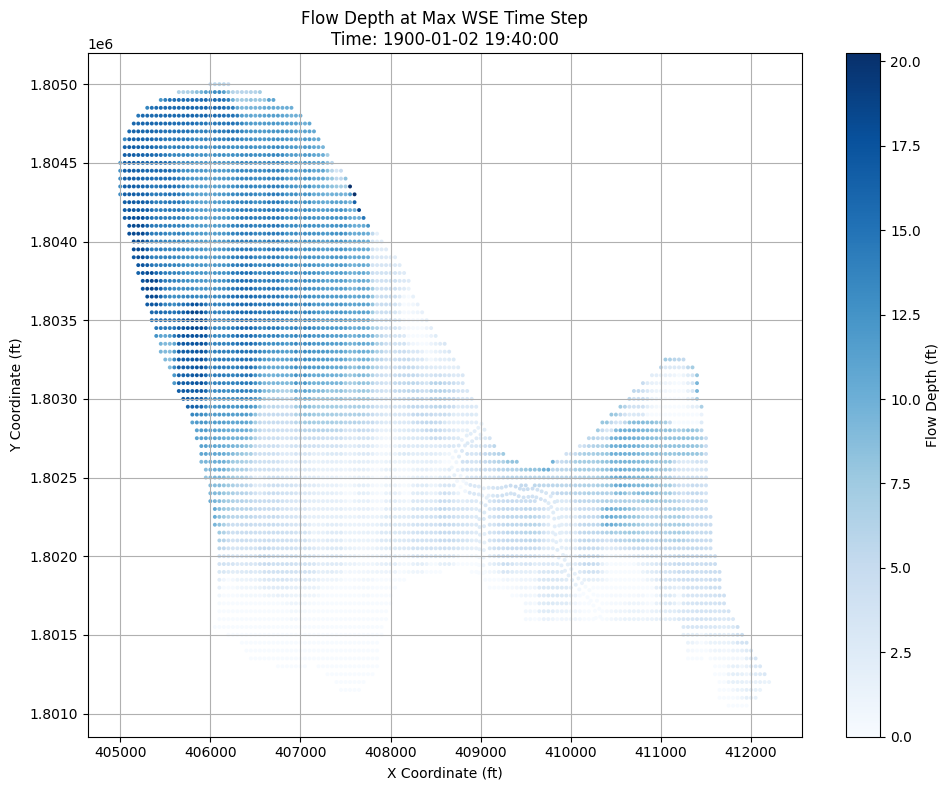

In [10]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# === Load the HDF5 file ===
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:

    # === Load datasets ===
    wse = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

# === Parse time and coordinates ===
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

# === Create xarray for WSE ===
wse_xr_ras = xr.DataArray(
    wse,
    dims=["time", "cell"],
    coords={"time": time_index, "x": ("cell", x_coords), "y": ("cell", y_coords)},
    name="water_surface_elevation",
    attrs={"units": "ft"}
)

# === Identify timestep with maximum average WSE ===
max_time_idx = wse_xr_ras.mean(dim="cell").argmax().item()
max_time = time_index[max_time_idx]
wse_at_max = wse_xr_ras.sel(time=max_time)

# === Calculate Flow Depth ===
flow_depth = wse_at_max - min_elev

# === Plot ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    wse_xr_ras["x"].values,
    wse_xr_ras["y"].values,
    c=flow_depth.values,
    cmap="Blues",
    s=8,
    edgecolor="none"
)
plt.colorbar(scatter, label="Flow Depth (ft)")
plt.title(f"Flow Depth at Max WSE Time Step\nTime: {max_time}")
plt.xlabel("X Coordinate (ft)")
plt.ylabel("Y Coordinate (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install required packages (run this in a Jupyter notebook cell)
!pip install xarray matplotlib imageio --quiet

import h5py
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

### --- Load Data ---
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:
    wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

### --- Set Up xarray ---
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

wse_xr_ras = xr.DataArray(
    wse_data,
    dims=["time", "cell"],
    coords={
        "time": time_index,
        "x": ("cell", x_coords),
        "y": ("cell", y_coords)
    },
    name="water_surface_elevation"
)

### --- Prepare Animation ---
filenames = []
vmin, vmax = np.nanmin(wse_data), np.nanmax(wse_data)  # consistent color scale

for i, t in tqdm(enumerate(wse_xr_ras.time.values), total=wse_xr_ras.sizes['time']):
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(wse_xr_ras.x, wse_xr_ras.y, c=wse_xr_ras.sel(time=t), cmap="viridis", s=8, vmin=vmin, vmax=vmax)
    plt.colorbar(sc, ax=ax, label="Water Surface Elevation (ft)")
    ax.set_title(f"WSE Time: {pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')}")
    ax.set_xlabel("X Coordinate (ft)")
    ax.set_ylabel("Y Coordinate (ft)")
    ax.grid(True)
    plt.tight_layout()

    filename = f"_frame_{i:04d}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

### --- Create GIF ---
with imageio.get_writer("wse_animation_RAS.gif", mode="I", duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### --- Cleanup PNGs ---
import os
for filename in filenames:
    os.remove(filename)

print("✅ Animation saved as wse_animation.gif")


------

# Using your Jupyter Notebook as Context to Add Functionality

For the rest of the exercise, we will use the new line of reasoning models (o1), using this notebook as context.  

Provide this notebook to any of the following models:

- ChatGPT
    - [o1](https://chatgpt.com/?model=o1)
    - [o3-mini high](https://chatgpt.com/?model=o3-mini-high)

- [Anthropic's Claude](https://claude.ai/)

- [Google's Gemini 2.5](https://aistudio.google.com/prompts/new_chat)

These are all State of the Art, Long Context Models with Reasoning Capability.  This enables longer scripts to be coded with a more consistent output and reduced errors. 

<div class="alert alert-block alert-info">
<b>Note:</b> Clear image outputs before saving and uploading.  The file size should be around 66KB.
</div>  


## OPTION 1: FLO2D: Calculate Flow x Depth and Save back to HDF

- **Objective**: Create a Python script to manipulate HDF5 file data.
- **File Path**: `Data\Hdf5\TIMDEPNC.HDF5`
- **Data Tasks**:
  - **Add Table `dep_x_vel`**: Multiply depth and velocity data.
  - **Add Table `dep_x_sqvel`**: Multiply depth by velocity squared.
- **Groups and Datasets**:
  - **Group `TIMDEP OUTPUT RESULTS/FLOW DEPTH`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
  - **Group `TIMDEP OUTPUT RESULTS/MAX VEL`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
- **Operations**:
  - **Delete Existing Datasets**: Check and delete existing datasets `dep_x_vel` and `dep_x_sqvel` if present.
  - **Calculate and Store New Data**: Compute and store new datasets for `dep_x_vel` and `dep_x_sqvel`.
- **Dependencies**: Utilize `h5py` for HDF5 interaction and `numpy` for mathematical operations.
- **Request**: Provide a Python script that executes the above operations as described.

In [11]:
# Insert Code Here

In [15]:
import h5py
import numpy as np
import os

def calculate_and_save_dep_vel():
    """
    Opens the FLO2D HDF5 file at Data/Hdf5/TIMDEPNC.HDF5, reads the flow depth and maximum velocity datasets,
    calculates new datasets (dep_x_vel = depth*velocity and dep_x_sqvel = depth*velocity^2),
    and stores them under /TIMDEP OUTPUT RESULTS/. Overwrites existing datasets of the same name if present.
    """

    file_path = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")

    with h5py.File(file_path, "r+") as hdf:
        # 1) Read Flow Depth values
        depth_path = "/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"
        depth_data = hdf[depth_path][()]  # shape (time_steps, num_cells)

        # 2) Read Max Velocity values
        velocity_path = "/TIMDEP OUTPUT RESULTS/MAX VEL/Values"
        vel_data = hdf[velocity_path][()]  # shape (time_steps, num_cells)

        # 3) Identify the parent group for storing new datasets
        output_group = hdf["/TIMDEP OUTPUT RESULTS"]

        # 4) Delete existing datasets if they exist
        if "dep_x_vel" in output_group:
            del output_group["dep_x_vel"]
        if "dep_x_sqvel" in output_group:
            del output_group["dep_x_sqvel"]

        # 5) Calculate new arrays
        dep_x_vel = depth_data * vel_data                 # depth * velocity
        dep_x_sqvel = depth_data * (vel_data ** 2)        # depth * velocity^2

        # 6) Create new datasets
        output_group.create_dataset("dep_x_vel", data=dep_x_vel, dtype="float32")
        output_group.create_dataset("dep_x_sqvel", data=dep_x_sqvel, dtype="float32")

        print("New datasets created and saved: dep_x_vel, dep_x_sqvel")

# Uncomment and run this cell to execute:
calculate_and_save_dep_vel()


New datasets created and saved: dep_x_vel, dep_x_sqvel


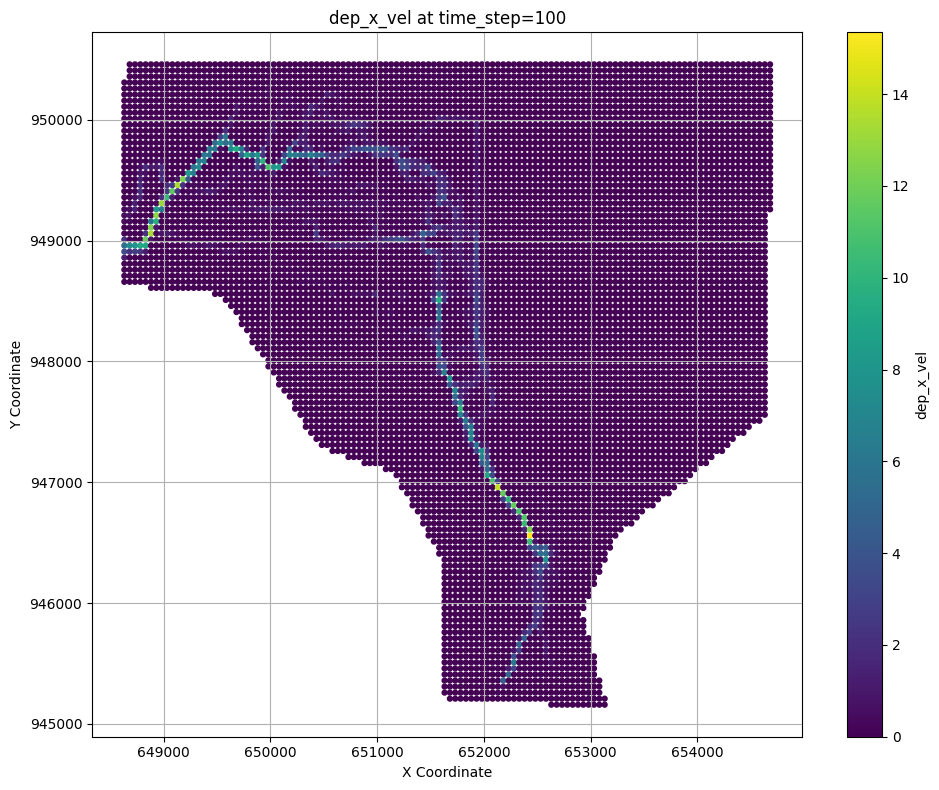

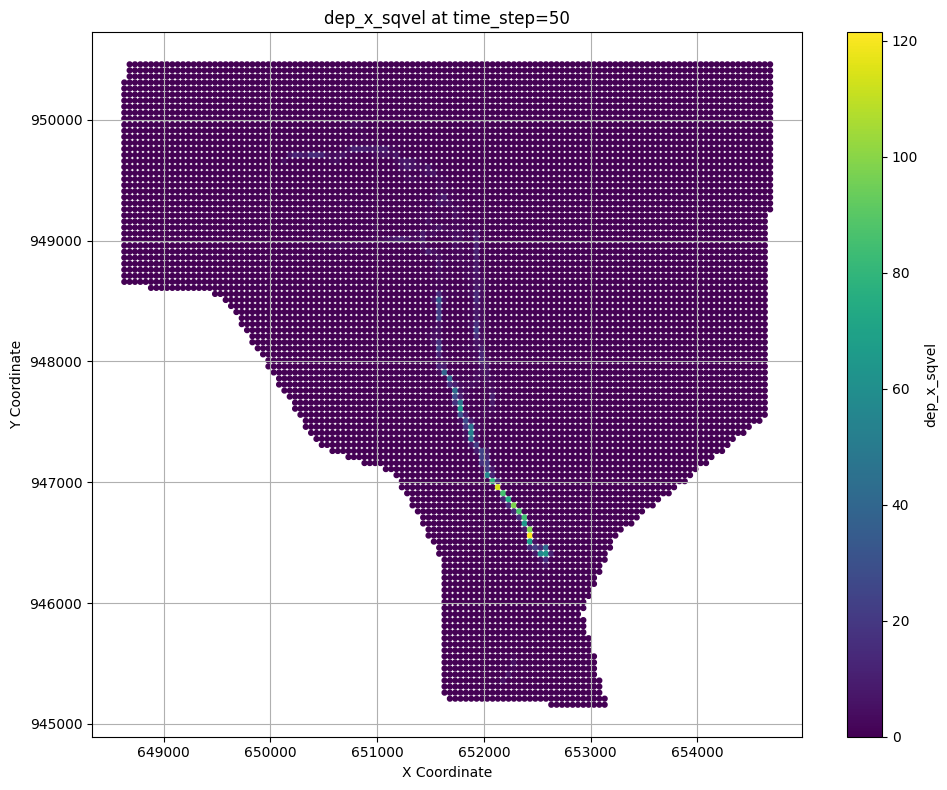

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_dep_x_dataset(dataset_name="dep_x_vel", time_step=0):
    """
    Reads the specified dataset (dep_x_vel or dep_x_sqvel) from TIMDEPNC.HDF5, 
    then plots it spatially using the X-Coordinate/Values and Y-Coordinate/Values 
    from the same HDF group.

    Parameters:
    -----------
    dataset_name : str
        The name of the dataset to load from the HDF file. 
        Options: "dep_x_vel" or "dep_x_sqvel".

    time_step : int
        The time-step index to plot (0-based index).
    """

    file_path = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")

    with h5py.File(file_path, "r") as hdf:
        # 1) Load new dataset (dep_x_vel or dep_x_sqvel)
        dset_path = f"/TIMDEP OUTPUT RESULTS/{dataset_name}"
        data = hdf[dset_path][()]  # shape = (time_steps, num_cells)

        # 2) Load coordinates (flatten if shape=(1, n))
        x_coords = hdf["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][()].squeeze()
        y_coords = hdf["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][()].squeeze()

        # 3) Make sure time_step is within range
        n_timesteps = data.shape[0]
        if time_step < 0 or time_step >= n_timesteps:
            raise IndexError(
                f"time_step {time_step} out of range (valid range: 0 to {n_timesteps-1})"
            )

        # 4) Select the data for the chosen time step
        data_at_t = data[time_step, :]

    # 5) Plot
    plt.figure(figsize=(10, 8))
    sc = plt.scatter(x_coords, y_coords, c=data_at_t, s=12, cmap="viridis")
    cbar = plt.colorbar(sc)
    cbar.set_label(dataset_name)

    plt.title(f"{dataset_name} at time_step={time_step}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_dep_x_dataset("dep_x_vel", time_step=100)
plot_dep_x_dataset("dep_x_sqvel", time_step=50)


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def map_dep_vel_at_max(file_path="Data/Hdf5/TIMDEPNC.HDF5"):
    """
    Loads the new FLO2D results (dep_x_vel and dep_x_sqvel), finds the time step
    with the maximum sum of dep_x_vel, and plots both on separate scatter plots.
    
    Parameters
    ----------
    file_path : str
        Path to the FLO2D HDF5 file (default assumes local folder structure).
    """
    with h5py.File(file_path, "r") as hdf:
        # --- Load data ---
        dep_vel = hdf["/TIMDEP OUTPUT RESULTS/dep_x_vel"][()]   # shape: (time_steps, num_cells)
        dep_sqvel = hdf["/TIMDEP OUTPUT RESULTS/dep_x_sqvel"][()]  # shape: (time_steps, num_cells)
        times = hdf["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times"][()] # shape: (time_steps,)
        
        x_coords = hdf["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()  # shape: (num_cells,)
        y_coords = hdf["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()  # shape: (num_cells,)

    # --- Select a time step; here we use the time step with the max sum of dep_x_vel
    max_sum_idx = np.argmax(np.sum(dep_vel, axis=1))
    max_time = times[max_sum_idx]

    # --- Plot dep_x_vel ---
    plt.figure(figsize=(9, 7))
    scatter_dep_vel = plt.scatter(
        x_coords,
        y_coords,
        c=dep_vel[max_sum_idx],
        cmap="viridis",
        s=8
    )
    cbar_dep_vel = plt.colorbar(scatter_dep_vel)
    cbar_dep_vel.set_label("Depth * Velocity")
    plt.title(f"dep_x_vel at t = {max_time:.2f} (hours), index = {max_sum_idx}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --- Plot dep_x_sqvel ---
    plt.figure(figsize=(9, 7))
    scatter_dep_sqvel = plt.scatter(
        x_coords,
        y_coords,
        c=dep_sqvel[max_sum_idx],
        cmap="plasma",
        s=8
    )
    cbar_dep_sqvel = plt.colorbar(scatter_dep_sqvel)
    cbar_dep_sqvel.set_label("Depth * Velocity^2")
    plt.title(f"dep_x_sqvel at t = {max_time:.2f} (hours), index = {max_sum_idx}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Usage ---
# 1. First run the "calculate_and_save_dep_vel()" function (from the previous cell) to create dep_x_vel and dep_x_sqvel.
# 2. Then run this function to map the results.
#
map_dep_vel_at_max()


## OPTION 2: FLO2D Flood Wave Arrival Time

`Assuming the notebook has been run and the xarrays above are present, add a code cell for FLO2D that will find the time stamp of each grid cell, at the time where it exceeds 1ft in depth.  This indicates the first arrival of the flood wave. Create a function to find this and calculate time_to_1ft and save the daaset back to the hdf.  The function should overwrite the dataset in the hdf if it exists.  I should also plot a map of the flood wave arrival time time in hr.`

In [13]:
# Insert Code Here

✅ time_to_1_ft saved to HDF5 under /TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft


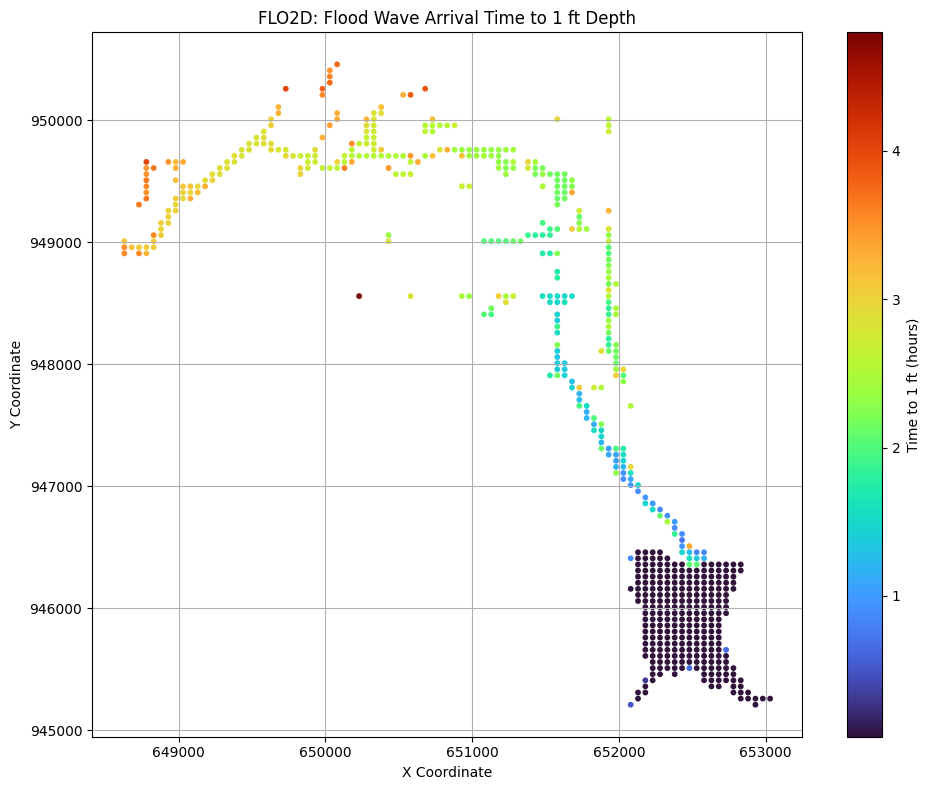

✅ time_to_1_ft saved to HDF5 under /TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft


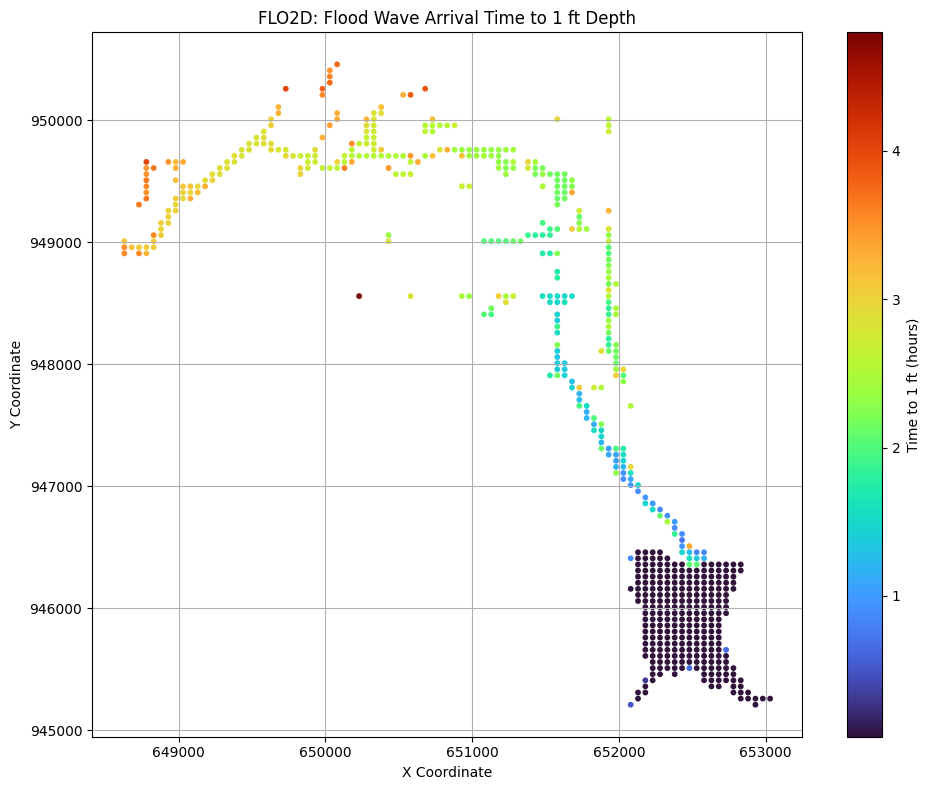

In [22]:
import numpy as np
import xarray as xr
import h5py
import matplotlib.pyplot as plt
import os

def compute_and_save_flo2d_arrival_time(flow_depth_xr: xr.DataArray, 
                                        hdf5_path: str = "Data/Hdf5/TIMDEPNC.HDF5"):
    """
    Given a FLO2D flow depth xarray DataArray with dimensions (time, element),
    finds the first time at which each cell's depth exceeds 1 ft.
    
    The function then:
      1) Overwrites or creates /TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft in the HDF5 file.
      2) Produces a scatter plot of arrival time in hours.

    Parameters
    ----------
    flow_depth_xr : xr.DataArray
        A DataArray of shape (time, element), containing flow depth over time
        with 'time' and 'element' as dimensions, plus 'x' and 'y' coordinates.
        - flow_depth_xr[time, element]
        - flow_depth_xr.coords['time']: array of time steps (float hours)
        - flow_depth_xr.coords['x']: array of x-coordinates (num_cells)
        - flow_depth_xr.coords['y']: array of y-coordinates (num_cells)

    hdf5_path : str
        Path to the FLO2D HDF5 file. Defaults to "Data/Hdf5/TIMDEPNC.HDF5".
    """
    
    # 1) Extract numeric time, depth values, and coords
    times = flow_depth_xr.coords["time"].values  # shape: (num_times,)
    depth_values = flow_depth_xr.values          # shape: (num_times, num_cells)
    x_coords = flow_depth_xr.coords["x"].values  # shape: (num_cells,)
    y_coords = flow_depth_xr.coords["y"].values  # shape: (num_cells,)

    num_times, num_cells = depth_values.shape

    # 2) For each cell, find the earliest time index where depth >= 1.0 ft
    arrival_times = np.full(num_cells, np.nan, dtype=np.float64)
    threshold = 1.0  # 1 ft

    for cell_idx in range(num_cells):
        cell_depths = depth_values[:, cell_idx]       # shape: (num_times,)
        above_threshold = cell_depths >= threshold

        if np.any(above_threshold):
            # first time index where above_threshold is True
            first_idx = np.argmax(above_threshold)
            arrival_times[cell_idx] = times[first_idx]
        # otherwise remains NaN (never crosses threshold)

    # 3) Overwrite or create time_to_1_ft in the HDF5 file
    with h5py.File(hdf5_path, "r+") as hdf:
        parent_group = hdf["/TIMDEP OUTPUT RESULTS/FLOW DEPTH"]
        
        # Delete existing dataset if present
        if "time_to_1_ft" in parent_group:
            del parent_group["time_to_1_ft"]
        
        # Create new dataset
        parent_group.create_dataset("time_to_1_ft", data=arrival_times, dtype="float64")

    print("✅ time_to_1_ft saved to HDF5 under /TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft")

    # 4) Plot the flood wave arrival time (hours)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        x_coords,
        y_coords,
        c=arrival_times,
        s=10,
        cmap="turbo"
    )
    cbar = plt.colorbar(scatter)
    cbar.set_label("Time to 1 ft (hours)")

    plt.title("FLO2D: Flood Wave Arrival Time to 1 ft Depth")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

import h5py
import xarray as xr
import numpy as np
import os

def create_flo2d_depth_dataarray():
    """
    Reads FLO2D depth data (and corresponding times, x-coords, y-coords) from TIMDEPNC.HDF5
    and returns an xarray DataArray named 'depth_xr_flo'.
    """
    file_path = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")

    with h5py.File(file_path, "r") as f:
        # Load depth values (shape: [num_times, num_cells])
        depth_data = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
        
        # Load times (shape: [num_times])
        depth_times = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times"][:]
        
        # Load x/y coords (shape: [1, num_cells]), flatten to shape [num_cells]
        x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
        y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

    # Create the xarray DataArray (time, element)
    depth_xr_flo = xr.DataArray(
        data=depth_data,
        dims=["time", "element"],
        coords={
            "time": depth_times,   # numeric or float times in hours
            "x": (["element"], x_coords),
            "y": (["element"], y_coords)
        },
        name="flow_depth"
    )

    return depth_xr_flo


depth_xr_flo = create_flo2d_depth_dataarray()
compute_and_save_flo2d_arrival_time(flow_depth_xr=depth_xr_flo)


#
compute_and_save_flo2d_arrival_time(flow_depth_xr=depth_xr_flo)


# OPTION 3: RAS 2D Flood Wave Arrival Time

'Assuming the notebook has been run and the xarrays above are present, add a code cell similar to Option 2, but for HEC-RAS 2D`




In [ ]:
# Insert Code Here

In [24]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import os

def create_ras_depth_dataarray():
    """
    Reads water surface (WSE), minimum cell elevations, and time from RAS_Muncie.p04.hdf,
    then returns a new DataArray that represents flow depth for each cell at each time.
    """
    file_path = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
    with h5py.File(file_path, "r") as hdf:
        # Water Surface Elevation: shape (num_times, num_cells)
        wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
        
        # Cell Center Coordinates: shape (num_cells, 2)
        coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
        x_coords, y_coords = coords[:,0], coords[:,1]
        
        # Minimum Elevations: shape (num_cells,)
        min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
        
        # Timestamps (strings like 02JAN1900 00:00:00): shape (num_times,)
        time_str = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)
        time_index = pd.to_datetime(time_str, format="%d%b%Y %H:%M:%S")

    # Convert WSE -> Depth
    # shape of wse_data is (num_times, num_cells), so we broadcast min_elev
    # to the same shape by subtracting along axis=1
    depth_data = wse_data - min_elev[np.newaxis, :]

    # Create an xarray for depth: (time, cell)
    depth_xr_ras = xr.DataArray(
        data=depth_data,
        dims=["time", "cell"],
        coords={
            "time": time_index,
            "x": (["cell"], x_coords),
            "y": (["cell"], y_coords)
        },
        name="ras_flow_depth"
    )
    return depth_xr_ras

# Usage (if you want to test creating it):
ras_depth_xr = create_ras_depth_dataarray()
print(ras_depth_xr)


<xarray.DataArray 'ras_flow_depth' (time: 289, cell: 5765)> Size: 7MB
array([[0.       , 0.       , 0.       , ...,       nan,       nan,
              nan],
       [0.       , 0.       , 0.       , ...,       nan,       nan,
              nan],
       [0.       , 0.       , 0.       , ...,       nan,       nan,
              nan],
       ...,
       [5.0392456, 5.767029 , 6.104248 , ...,       nan,       nan,
              nan],
       [5.037781 , 5.765564 , 6.102844 , ...,       nan,       nan,
              nan],
       [5.036316 , 5.76416  , 6.1013794, ...,       nan,       nan,
              nan]], shape=(289, 5765), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1900-01-02 ... 1900-01-03
    x        (cell) float64 46kB 4.06e+05 4.06e+05 ... 4.122e+05 4.117e+05
    y        (cell) float64 46kB 1.805e+06 1.805e+06 ... 1.801e+06 1.801e+06
Dimensions without coordinates: cell


✅ time_to_1_ft saved to:
   /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_1_ft
   (Stored in hours from the first time index: 1900-01-02 00:00:00)


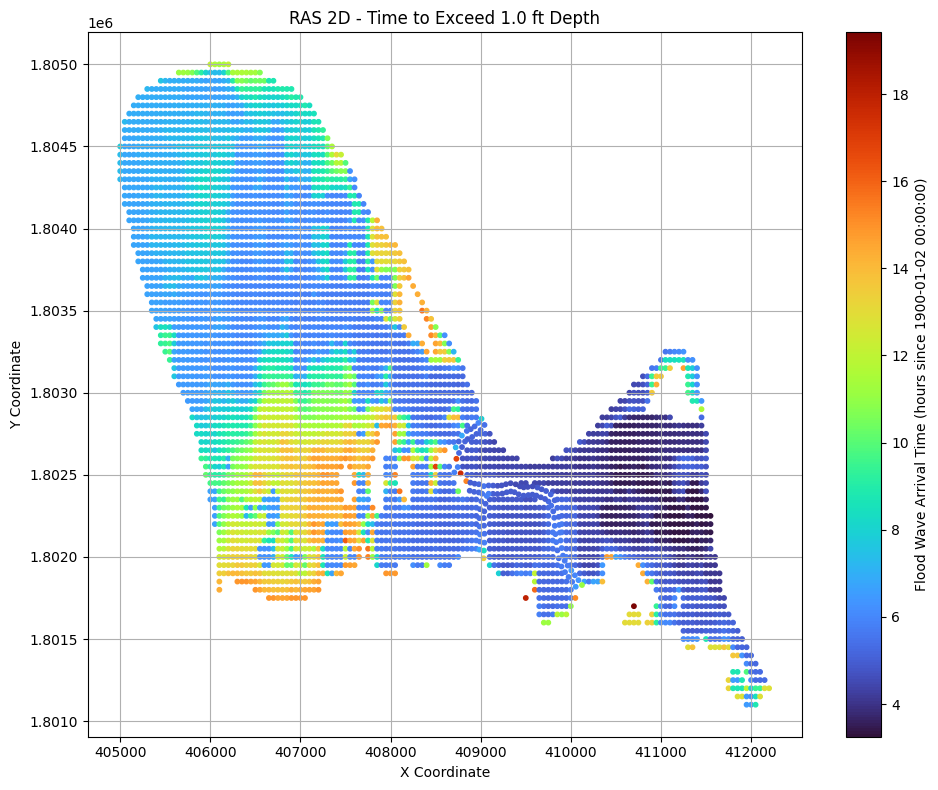

In [26]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def compute_and_map_ras_arrival_time(hdf5_path="Data/Hdf5/RAS_Muncie.p04.hdf", threshold=1.0):
    """
    1) Opens a HEC-RAS 2D HDF5 file.
    2) Computes flow depth at each time (WSE - min elevation).
    3) Identifies the earliest time each cell exceeds `threshold` ft.
    4) Saves a 1D dataset 'time_to_1_ft' (in hours from the first time index)
       under:
         /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_1_ft
    5) Plots the arrival time in a scatter map of x,y.

    Parameters
    ----------
    hdf5_path : str
        Path to the RAS 2D HDF5 file.

    threshold : float
        The flood-depth threshold for “flood wave arrival” (in ft).
    """

    # -----------------------------
    # 1) Read data from the HDF5
    # -----------------------------
    with h5py.File(hdf5_path, "r") as hdf:
        # Water Surface data: shape (num_times, num_cells)
        wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
        
        # Minimum Elevation (cells): shape (num_cells,)
        min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]

        # Cell center coordinates: shape (num_cells, 2)
        coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
        x_coords, y_coords = coords[:, 0], coords[:, 1]

        # Time stamps (strings like "02JAN1900 00:00:00"): shape (num_times,)
        time_str = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

    # -----------------------------
    # 2) Convert to flow depth
    # -----------------------------
    # wse_data shape: (num_times, num_cells)
    # min_elev shape: (num_cells,)
    depth_data = wse_data - min_elev[np.newaxis, :]

    # -----------------------------
    # 3) Convert time to hours from start
    # -----------------------------
    # Parse the time strings as pandas datetime
    time_index = pd.to_datetime(time_str, format="%d%b%Y %H:%M:%S")
    t0 = time_index[0]
    time_hours = np.array([(t - t0).total_seconds()/3600 for t in time_index])

    num_times, num_cells = depth_data.shape

    # -----------------------------
    # 4) Find arrival time (>= threshold)
    # -----------------------------
    arrival_times = np.full(num_cells, np.nan, dtype=np.float64)

    for cell_idx in range(num_cells):
        cell_depths = depth_data[:, cell_idx]
        # Find first occurrence where depth >= threshold
        above_thresh = cell_depths >= threshold
        if np.any(above_thresh):
            first_idx = np.argmax(above_thresh)  # index of first True
            arrival_times[cell_idx] = time_hours[first_idx]

    # -----------------------------
    # 5) Save 'time_to_1_ft' in HDF5
    # -----------------------------
    with h5py.File(hdf5_path, "r+") as hdf:
        ras_2d_area_group = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area"]

        # If dataset exists, delete it
        if "time_to_1_ft" in ras_2d_area_group:
            del ras_2d_area_group["time_to_1_ft"]

        # Create new dataset (num_cells)
        ras_2d_area_group.create_dataset("time_to_1_ft", data=arrival_times, dtype="float64")

    print("✅ time_to_1_ft saved to:")
    print("   /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_1_ft")
    print(f"   (Stored in hours from the first time index: {t0})")

    # -----------------------------
    # 6) Plot arrival time
    # -----------------------------
    plt.figure(figsize=(10, 8))
    scatter_plot = plt.scatter(
        x_coords,
        y_coords,
        c=arrival_times,
        cmap="turbo",
        s=10
    )
    cbar = plt.colorbar(scatter_plot)
    cbar.set_label(f"Flood Wave Arrival Time (hours since {t0.strftime('%Y-%m-%d %H:%M:%S')})")

    plt.title(f"RAS 2D - Time to Exceed {threshold} ft Depth")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Usage ===
compute_and_map_ras_arrival_time()


# OPTION 4: RAS 2D Time of Max WSEL

'Assuming the notebook has been run and the xarrays above are present, add a code cell that will find the timestamp of the max wsel of each cell, calculate time_to_max_wsel and map it. 




In [14]:
# Insert Code Here

✅ 'time_to_max_wsel' saved to:
   /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_max_wsel
   (Values are hours from 1900-01-02 00:00:00)


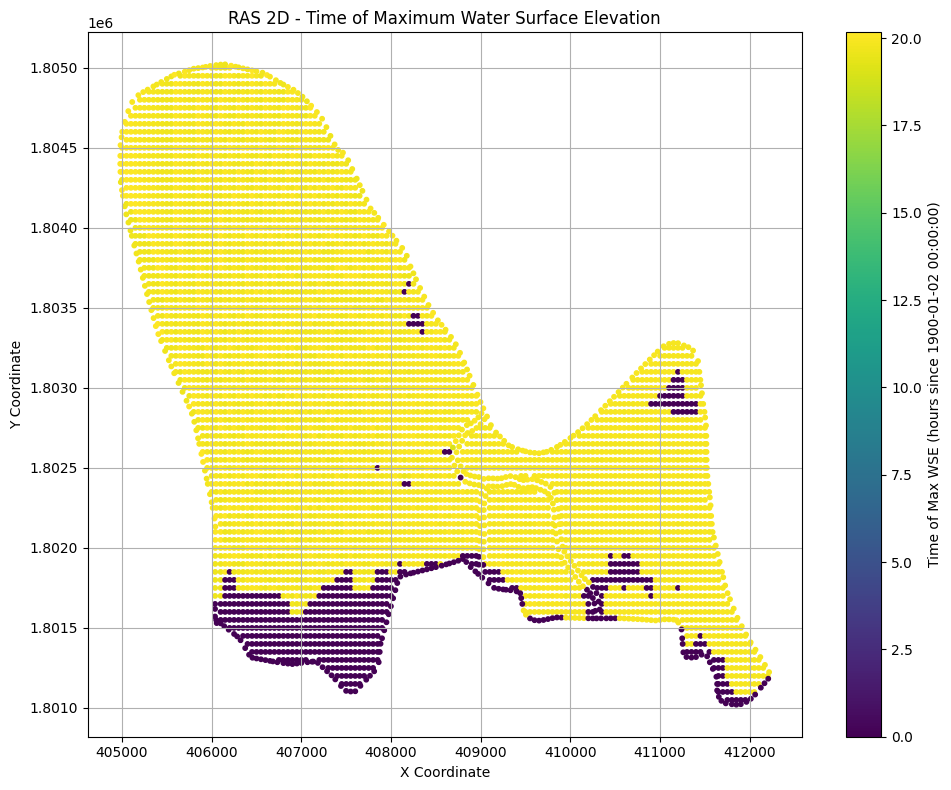

In [27]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def compute_and_map_time_of_max_wsel(hdf5_path="Data/Hdf5/RAS_Muncie.p04.hdf"):
    """
    1) Reads WSE data, time stamps, and cell center coordinates from RAS_Muncie.p04.hdf.
    2) Finds the time (in hours from the first time index) at which each cell's WSE is max.
    3) Saves a dataset named 'time_to_max_wsel' under:
         /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_max_wsel
    4) Creates a scatter plot of the result.
    """

    # -----------------------------
    # 1) Load data from the HDF5
    # -----------------------------
    with h5py.File(hdf5_path, "r") as hdf:
        # Water Surface data (times x cells)
        wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
        
        # Time stamps (e.g., "02JAN1900 00:00:00")
        time_str = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

        # Cell center coords
        coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
        x_coords, y_coords = coords[:, 0], coords[:, 1]

    # Convert time stamps to datetime and hours from the start
    time_index = pd.to_datetime(time_str, format="%d%b%Y %H:%M:%S")
    t0 = time_index[0]
    time_hours = np.array([(t - t0).total_seconds()/3600 for t in time_index])

    # -----------------------------
    # 2) Find time of max WSE
    # -----------------------------
    # For each cell, find the index of maximum WSE
    # shape of wse_data: (num_times, num_cells)
    num_times, num_cells = wse_data.shape
    max_wse_indices = np.argmax(wse_data, axis=0)  # shape: (num_cells,)

    # Convert those indices to hours
    time_to_max_wsel = time_hours[max_wse_indices]  # shape: (num_cells,)

    # -----------------------------
    # 3) Save to HDF5 as time_to_max_wsel
    # -----------------------------
    with h5py.File(hdf5_path, "r+") as hdf:
        ras_2d_area_group = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area"]

        # Remove dataset if it exists
        if "time_to_max_wsel" in ras_2d_area_group:
            del ras_2d_area_group["time_to_max_wsel"]

        # Create new dataset
        ras_2d_area_group.create_dataset("time_to_max_wsel", data=time_to_max_wsel, dtype="float64")

    print("✅ 'time_to_max_wsel' saved to:")
    print("   /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/time_to_max_wsel")
    print(f"   (Values are hours from {t0})")

    # -----------------------------
    # 4) Plot the result
    # -----------------------------
    plt.figure(figsize=(10, 8))
    sc = plt.scatter(
        x_coords,
        y_coords,
        c=time_to_max_wsel,
        cmap="viridis",
        s=10
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(f"Time of Max WSE (hours since {t0.strftime('%Y-%m-%d %H:%M:%S')})")

    plt.title("RAS 2D - Time of Maximum Water Surface Elevation")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Usage ===
compute_and_map_time_of_max_wsel()


# Exporting Data to Other Formats

`Provide a comprehensive list of file formats that can be used to export the data in this notebook.  Favor free and open source solutions.`

Below is a **comprehensive (but not exhaustive) list of free/open-source-friendly** file formats you can use to export your data from Python notebooks (especially relevant to numerical data, tabular data, geospatial data, and time-series). Each format is either **open** or **widely-used** in the open-source ecosystem.

---

## 1. **CSV (Comma-Separated Values)**
- **What**: Plain-text table format, rows separated by line breaks, columns by commas (or other delimiters).
- **Pros**:
  - Human-readable, near-universal support.
  - Perfect for basic tables (one sheet).
- **Cons**:
  - No support for hierarchical data, binary objects, or metadata.
  - Large files can become unwieldy.
- **Libraries**: Built-in Python I/O, `pandas`, etc.
- **Example**:
  ```python
  import pandas as pd

  df = pd.DataFrame({"A": [1,2,3], "B": [4,5,6]})
  df.to_csv("output.csv", index=False)
  ```

---

## 2. **TSV (Tab-Separated Values)**
- **What**: Similar to CSV but uses tabs as the delimiter.
- **Pros** & **Cons**: Same as CSV, just different delimiter.
- **Example**:
  ```python
  df.to_csv("output.tsv", sep="\t", index=False)
  ```

---

## 3. **JSON (JavaScript Object Notation)**
- **What**: Text-based format for hierarchical/structured data.
- **Pros**:
  - Widely used in web APIs.
  - Human-readable for small data.
  - Good for dictionaries or nested data.
- **Cons**:
  - Can be large or cumbersome for big numeric arrays.
- **Libraries**: `json` module in Python, `pandas` read/write JSON.
- **Example**:
  ```python
  import json

  data = {"name": "Alice", "values": [1,2,3]}
  with open("output.json", "w") as f:
      json.dump(data, f, indent=2)
  ```

---

## 4. **Parquet**
- **What**: Columnar storage format often used in big-data ecosystems.
- **Pros**:
  - Highly efficient for large datasets.
  - Can store numeric, string, or mixed data with compression.
  - Very fast read/write in Python with `pyarrow` or `pandas`.
- **Cons**:
  - Less human-readable (binary format).
- **Libraries**: `pandas`, `pyarrow`.
- **Example**:
  ```python
  df.to_parquet("output.parquet")
  ```

---

## 5. **Feather**
- **What**: Another columnar binary format built on Apache Arrow.
- **Pros**:
  - Very fast read/write.
  - Ideal for quick Python <-> R data exchange.
- **Cons**:
  - Not human-readable (binary).
  - Mostly used for in-memory analytics (similar to Parquet).
- **Libraries**: `pyarrow.feather` or `pandas`.
- **Example**:
  ```python
  df.to_feather("output.feather")
  ```

---

## 6. **HDF5**
- **What**: Hierarchical Data Format for large, complex datasets.
- **Pros**:
  - Great for large-scale numeric data, chunking, compression.
  - Allows hierarchical grouping, metadata, partial I/O access.
- **Cons**:
  - Not human-readable (binary).
  - Tools are more complex than CSV/JSON.
- **Libraries**: `h5py`, `pandas` (to_hdf), `xarray`.
- **Example** (using `h5py`):
  ```python
  import h5py
  import numpy as np

  with h5py.File("output.h5", "w") as f:
      f.create_dataset("my_dataset", data=np.random.rand(100, 100))
  ```

---

## 7. **NetCDF (Classic or NetCDF4)**
- **What**: Common in geosciences for storing array-oriented scientific data (built on HDF).
- **Pros**:
  - Standard for meteorological, oceanographic, and other time-series / multi-dimensional data.
  - Excellent compression and metadata handling.
- **Cons**:
  - Not human-readable (binary).
- **Libraries**: `xarray`, `netCDF4`.
- **Example** (using xarray):
  ```python
  ds.to_netcdf("output.nc")
  ```

---

## 8. **Zarr**
- **What**: A newer open-source format for chunked, compressed, N-dimensional arrays in the cloud or locally.
- **Pros**:
  - Very flexible, supports lazy loading, parallel writes, scalable cloud storage.
  - Directory-based structure can integrate well with object storage (S3, etc.).
- **Cons**:
  - Not as ubiquitous as NetCDF/HDF5 yet.
- **Libraries**: `zarr`, `xarray` (supports `.to_zarr()`).
- **Example**:
  ```python
  ds.to_zarr("output.zarr")
  ```

---

## 9. **Plain Text / ASCII**
- **What**: Minimal approach for small data or quick logs.  
- **Pros**:
  - Extremely simple, universal.
- **Cons**:
  - No structure for complex data, no compression for large scale.
- **Example**:
  ```python
  with open("output.txt", "w") as f:
      f.write("Just some text or logs...")
  ```

---

## 10. **Excel (XLSX)**
- **What**: Widely recognized spreadsheet format.
- **Pros**:
  - Interchange with non-programmer stakeholders (common office environment).
- **Cons**:
  - Not open-source, though reading/writing xlsx is possible with open-source libraries.
  - Less ideal for extremely large or multi-dimensional data.
- **Libraries**: `openpyxl`, `pandas` (`.to_excel()`).
- **Example**:
  ```python
  df.to_excel("output.xlsx", index=False)
  ```

*(While XLSX is not an open-spec in the same sense as CSV/NetCDF, it is partially documented, and free libraries like `openpyxl` can read/write it.)*

---

## 11. **Geospatial Formats** (If You Have Coordinate Data)
If your data is **spatial** (coordinates, polygons, etc.), consider the following:

- **Shapefile**  
  - The “classic” ESRI format.  
  - Partially open specification.  
  - 3-5 associated files (.shp, .shx, .dbf, .prj, etc.).  
  ```python
  import geopandas as gpd
  gdf.to_file("output.shp")  # must be a GeoDataFrame
  ```
- **GeoJSON**  
  - JSON-based, open standard for simple geometry features.  
  - Human-readable.  
  ```python
  gdf.to_file("output.geojson", driver="GeoJSON")
  ```
- **GeoPackage**  
  - SQLite-based container for geospatial data (vector and raster).  
  - Single file, official OGC standard, widely supported.  
  ```python
  gdf.to_file("output.gpkg", driver="GPKG")
  ```

---

## 12. **Pickle** (Python-specific Serialization)
- **What**: Native Python object serialization.
- **Pros**:
  - Easiest for saving arbitrary Python objects.
- **Cons**:
  - Not safe for untrusted data (possible code execution on load).
  - Not a standard for data exchange outside Python.
- **Libraries**: built-in `pickle`, `joblib`.
- **Example**:
  ```python
  import pickle

  with open("output.pkl", "wb") as f:
      pickle.dump(my_python_object, f)
  ```

---

## 13. **Feather / IPC / Arrow (for in-memory)** 
- Already mentioned Feather.  
- Direct Arrow IPC streams can be used in distributed computing contexts.  

---

### Choosing a Format

- **Small, Tabular**: CSV or TSV is simplest.  
- **Large, Tabular**: Parquet or Feather for efficiency and compression.  
- **Complex, Hierarchical**: HDF5, NetCDF (common for environmental/time-series), or Zarr.  
- **Geospatial**: GeoPackage or GeoJSON for vector data.  
- **Intra-Python Only**: Pickle or joblib (though not recommended for long-term archiving or external sharing).  

All of these formats can be **read** and **written** using **free, open-source** Python libraries (`numpy`, `pandas`, `xarray`, `geopandas`, etc.). This gives you a flexible pipeline for exporting your data for further analysis, archiving, sharing, or visualization in other applications.

https://chatgpt.com/share/67f2d0f0-157c-8010-9276-69749c7aca96